In [1]:
!pip install kaggle

In [10]:
# configuring the path of Kaggle. json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c cifar-10

 99% 705M/715M [00:09<00:00, 44.9MB/s]
100% 715M/715M [00:09<00:00, 80.2MB/s]


In [11]:
from zipfile import ZipFile

In [12]:
dataset = '/content/cifar-10.zip'

In [13]:
with ZipFile(dataset , 'r') as zip:
  zip.extractall()
print("Extraction done!")

Extraction done!


In [14]:
!pip install py7zr

In [15]:
import py7zr

In [16]:
archieve = py7zr.SevenZipFile('/content/train.7z' , mode = 'r')
archieve.extractall()
print("Extraction done!")

Extraction done!


In [17]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [18]:
gpus = tf.config.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [19]:
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu , 'True')

In [20]:
train_set = '/content/train'

In [21]:
os.listdir(train_set)

['331.png',
 '39102.png',
 '5907.png',
 '39405.png',
 '27131.png',
 '22769.png',
 '13711.png',
 '2742.png',
 '27099.png',
 '47513.png',
 '42574.png',
 '6819.png',
 '10568.png',
 '13511.png',
 '13780.png',
 '42278.png',
 '22728.png',
 '42646.png',
 '23076.png',
 '41127.png',
 '49811.png',
 '40194.png',
 '21587.png',
 '23561.png',
 '19506.png',
 '8962.png',
 '28519.png',
 '33135.png',
 '47589.png',
 '7311.png',
 '99.png',
 '32346.png',
 '27495.png',
 '36767.png',
 '48750.png',
 '5962.png',
 '32704.png',
 '23722.png',
 '4670.png',
 '44461.png',
 '24324.png',
 '33300.png',
 '47612.png',
 '12143.png',
 '19426.png',
 '30193.png',
 '21454.png',
 '24956.png',
 '42404.png',
 '40027.png',
 '30891.png',
 '41295.png',
 '14244.png',
 '12047.png',
 '27568.png',
 '28340.png',
 '34779.png',
 '36329.png',
 '44075.png',
 '10598.png',
 '47582.png',
 '26778.png',
 '29495.png',
 '8117.png',
 '44568.png',
 '4319.png',
 '28753.png',
 '12807.png',
 '27226.png',
 '35489.png',
 '8004.png',
 '43241.png',
 '43818

In [22]:
import PIL
import pandas as pd

In [23]:
df = pd.read_csv('/content/trainLabels.csv')
df.head()
df.shape

(50000, 2)

In [24]:
df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [25]:
df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


Categorize these labels

In [26]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
labels = [labels_dictionary[i] for i in df['label']]
print(labels)

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

Reading an image

In [27]:
from PIL import Image
import matplotlib.image as mpimg


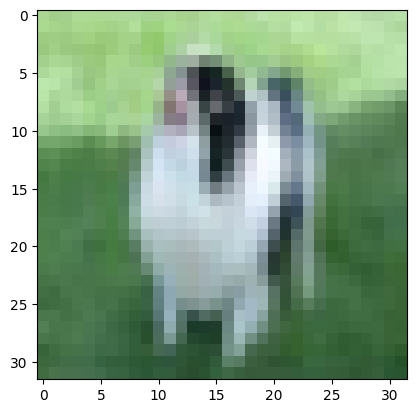

In [28]:
image = mpimg.imread('/content/train/31486.png')
plt.imshow(image)

In [29]:
id_list = list(df['id'])
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [30]:
train_data_folder = '/content/train/'
data = []

for id in id_list:
    image_path = Image.open(train_data_folder + str(id) + '.png')
    image_path = np.array(image_path)
    data.append(image_path)

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]], dtype=uint8)
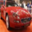

In [31]:
data[5]

In [32]:
# convert imagea and labels to numpy array (from list)
x = np.array(data)
y = np.array(labels)

In [33]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


In [34]:
from sklearn.model_selection import train_test_split


In [35]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 2)

In [36]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

Model build

In [37]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten , Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

Building a simple neural network first

In [38]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense

# Configure GPU options directly with TensorFlow
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [39]:

number_of_classes = 10
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,322 (770.79 KB)

 Trainable params: 197,322 (770.79 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['acc'])

In [41]:
model.fit(x_train_scaled , y_train , validation_split = 0.1 , epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.2390 - loss: 2.0708 - val_acc: 0.3347 - val_loss: 1.8414
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3385 - loss: 1.8342 - val_acc: 0.3438 - val_loss: 1.7963
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3573 - loss: 1.7948 - val_acc: 0.3620 - val_loss: 1.7749
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.3649 - loss: 1.7667 - val_acc: 0.3660 - val_loss: 1.7480
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.3750 - loss: 1.7445 - val_acc: 0.3758 - val_loss: 1.7442
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3814 - loss: 1.7288 - val_acc: 0.3890 - val_loss: 1.7105
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3832 - loss: 1.7239 - val_acc: 0.3772 - val_loss: 1.7502
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3938 - loss: 1.7066 - val_acc: 0.3720 - val_loss: 1.7560
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

Creating resnet model


In [42]:
convolutional_base = ResNet50(weights = 'imagenet' , include_top = False , input_shape = (256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [43]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2))) #(32*32)*2 = 64x64
model.add(layers.UpSampling2D((2,2))) #(64*64)*2 = 128x128
model.add(layers.UpSampling2D((2,2))) #(128*128)*2 = 256x256
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(number_of_classes, activation='softmax'))

In [44]:
model.compile(optimizer=optimizers.RMSprop(learning_rate= 2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [45]:
log_dir = '/content/log'
os.mkdir(log_dir)
print("Directory successfully created")

Directory successfully created


In [46]:
log_dir = 'log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [47]:
hist = model.fit(x_train_scaled , y_train , validation_split=0.1 , epochs=10 )

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 431s 330ms/step - acc: 0.3247 - loss: 2.0369 - val_acc: 0.7610 - val_loss: 0.8666
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 414s 337ms/step - acc: 0.6666 - loss: 1.0656 - val_acc: 0.9005 - val_loss: 0.4570
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 337ms/step - acc: 0.8022 - loss: 0.7539 - val_acc: 0.9185 - val_loss: 0.3494
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 373s 328ms/step - acc: 0.8641 - loss: 0.5768 - val_acc: 0.9268 - val_loss: 0.2920
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 337ms/step - acc: 0.9051 - loss: 0.4569 - val_acc: 0.9310 - val_loss: 0.2577
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 372s 328ms/step - acc: 0.9319 - loss: 0.3589 - val_acc: 0.9348 - val_loss: 0.2359
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 381s 328ms/step - acc: 0.9527 - loss: 0.2841 - val_acc: 0.9420 - val_loss: 0.2175
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 382s 328ms/step - acc: 0.9624 - loss: 0.2369 - val_acc: 0.9463 - val_loss: 0.2054
Epoch 9/

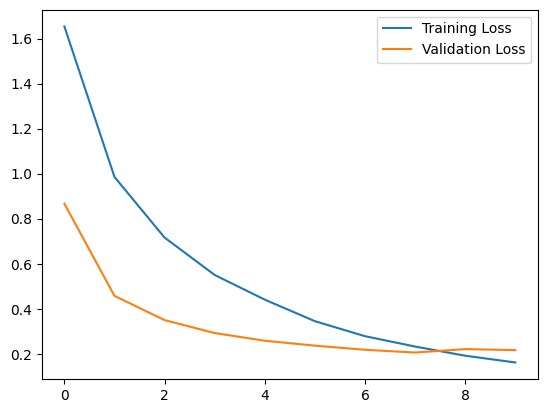

In [48]:
plt.plot(hist.history['loss'] , label = 'Training Loss')
plt.plot(hist.history['val_loss'] , label = 'Validation Loss')
plt.legend()
plt.show()

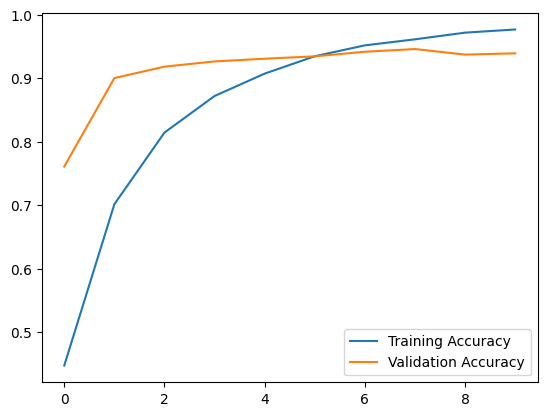

In [49]:
plt.plot(hist.history['acc'] , label = 'Training Accuracy')
plt.plot(hist.history['val_acc'] , label = 'Validation Accuracy')
plt.legend()
plt.show()

In [53]:
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 98ms/step - acc: 0.9379 - loss: 0.2184
Test Loss: 0.21673525869846344
Test Accuracy: 0.9387000203132629
